In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import food_data
import os

In [2]:
MODEL_NAME = 'cnn_v2'
MODEL_NAME_JSON = MODEL_NAME + '.json'

In [3]:
hist_df = pd.read_json('./histories/' + MODEL_NAME_JSON)

In [4]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,4.201525,0.041226,14.209825,0.000000
1,3.821522,0.095876,19.479111,0.000595
2,3.537518,0.143822,21.095596,0.001982
3,3.356122,0.178510,21.304087,0.001189
4,3.198567,0.209979,22.214174,0.001850
5,3.058326,0.240143,22.132395,0.002378
6,2.932704,0.266065,23.636448,0.001982
7,2.821792,0.288502,24.805971,0.004294


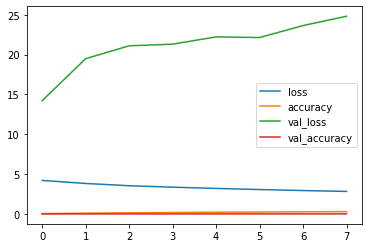

In [5]:
plt.plot(hist_df)
plt.legend(hist_df)

In [6]:
model = tf.keras.models.load_model('./models/' + MODEL_NAME)

In [7]:
def get_id(name):
    names = name.split("/")
    return names[1]

In [8]:
def get_label(path):
    names = path.split("/")
    return names[0]

In [9]:
def exact_path(path):
    return "../food-101/images/" + path + ".jpg"

In [10]:
LABELS = os.listdir("../food-101/images")
test_names = []

with open("../food-101/meta/test.txt") as f:
    test_names = f.readlines()
    print(test_names.__len__())


test_df = pd.DataFrame(map(lambda x: x[:-1], test_names), columns=['path'])
test_df['label'] = test_df['path'].map(lambda x: get_label(x))
test_df['id'] = test_df['path'].map(lambda x: get_id(x))
test_df['exact_path'] = test_df['path'].map(lambda x: exact_path(x))
test_df.head(10)

25250


,path,label,id,exact_path
0,apple_pie/1011328,apple_pie,1011328,../food-101/images/apple_pie/1011328.jpg
1,apple_pie/101251,apple_pie,101251,../food-101/images/apple_pie/101251.jpg
2,apple_pie/1034399,apple_pie,1034399,../food-101/images/apple_pie/1034399.jpg
3,apple_pie/103801,apple_pie,103801,../food-101/images/apple_pie/103801.jpg
4,apple_pie/1038694,apple_pie,1038694,../food-101/images/apple_pie/1038694.jpg
5,apple_pie/1047447,apple_pie,1047447,../food-101/images/apple_pie/1047447.jpg
6,apple_pie/1068632,apple_pie,1068632,../food-101/images/apple_pie/1068632.jpg
7,apple_pie/110043,apple_pie,110043,../food-101/images/apple_pie/110043.jpg
8,apple_pie/1106961,apple_pie,1106961,../food-101/images/apple_pie/1106961.jpg
9,apple_pie/1113017,apple_pie,1113017,../food-101/images/apple_pie/1113017.jpg


In [11]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255)

In [12]:
test_gen = test_generator.flow_from_dataframe(dataframe = test_df, directory=None, x_col='exact_path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=LABELS, class_mode='categorical', batch_size=32, shuffle=True)

Found 25250 validated image filenames belonging to 101 classes.


In [13]:
result = model.evaluate(test_gen, batch_size=32)

790/790 [==============================] - 111s 130ms/step - loss: 7.1723 - accuracy: 0.2587


In [14]:
preds = model.predict(test_gen)

790/790 [==============================] - 80s 101ms/step


In [15]:
preds.shape

(25250, 101)

In [37]:
INDEX = 1

In [38]:
GUESS_LABEL_INDEX = np.argmax(preds[INDEX])

In [39]:
LABELS[GUESS_LABEL_INDEX]

'oysters'

In [40]:
guess_info = test_df.iloc[INDEX]

'apple_pie'

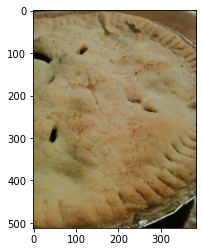

In [41]:
plt.imshow(plt.imread(guess_info['exact_path']))
guess_info['label']

In [42]:
food_search = food_data.search_foods(LABELS[GUESS_LABEL_INDEX].replace('_', ' '))

In [43]:
food_data.get_energy(food_search)

{'nutrientId': 1008,
 'nutrientName': 'Energy',
 'nutrientNumber': '208',
 'unitName': 'KCAL',
 'value': 188,
 'rank': 300,
 'indentLevel': 1,
 'foodNutrientId': 28766142}